# Develop A Neural Network That Can Read Handwriting

# By Srilatha

In [17]:
import tensorflow as tf
from numpy import unique , argmax 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


In [18]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [19]:
x_train =x_train.reshape((x_train.shape[0] , x_train.shape[1],x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] , x_test.shape[1],x_test.shape[2],1))

In [20]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

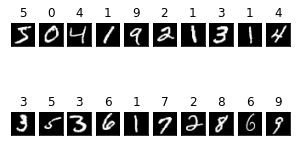

In [23]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

In [27]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

# BUILDING NEURAL NETWORK THAT CAN READ HANDWRITING

In [70]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [72]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [73]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.49726185, -0.4889118 ,  0.06905878, -0.34951493, -0.33538955,
        -0.22338106, -0.04759242,  0.6878432 , -0.19234017,  0.15846996]],
      dtype=float32)

In [74]:
tf.nn.softmax(predictions).numpy()

array([[0.06434161, 0.06488112, 0.11335532, 0.07458605, 0.07564709,
        0.08461296, 0.10087439, 0.21046337, 0.08728061, 0.12395746]],
      dtype=float32)

In [76]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

# Model fitting

In [77]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2973 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1451 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1104 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0885 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9760


In [78]:
model.evaluate(x_test, y_test, verbose=5)

[0.07435761392116547, 0.9757000207901001]

In [79]:
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.74912474e-08, 1.44940215e-09, 3.08014569e-06, 3.02459142e-04,
        3.04873869e-11, 9.32083992e-08, 1.53160945e-13, 9.99686241e-01,
        6.75550140e-08, 8.06207845e-06],
       [1.49027635e-09, 1.49989382e-05, 9.99983191e-01, 1.49620291e-06,
        1.32703923e-14, 2.56908113e-08, 2.47593279e-10, 3.94116434e-10,
        2.43115238e-07, 2.17249965e-13],
       [1.49584807e-08, 9.98733103e-01, 3.97253607e-04, 6.21601475e-06,
        5.08720295e-05, 3.32934324e-05, 7.47146260e-06, 6.57313212e-04,
        1.14282535e-04, 1.33737601e-07],
       [9.99683142e-01, 4.55070008e-08, 1.70472449e-05, 1.77618722e-06,
        5.65672110e-07, 8.19991765e-05, 1.67702718e-04, 8.42581721e-06,
        2.06998408e-07, 3.91518843e-05],
       [2.20127367e-06, 2.20641327e-09, 1.16407073e-05, 3.07795204e-07,
        9.95978355e-01, 1.23060454e-06, 3.89477179e-07, 7.92123086e-04,
        4.02064416e-07, 3.21329921e-03]], dtype=float32)>

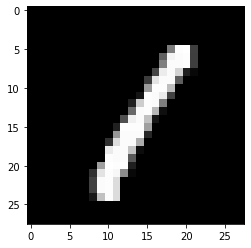

In [80]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [81]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 1
